# Breast Cancer Detection (Logistic Regression)

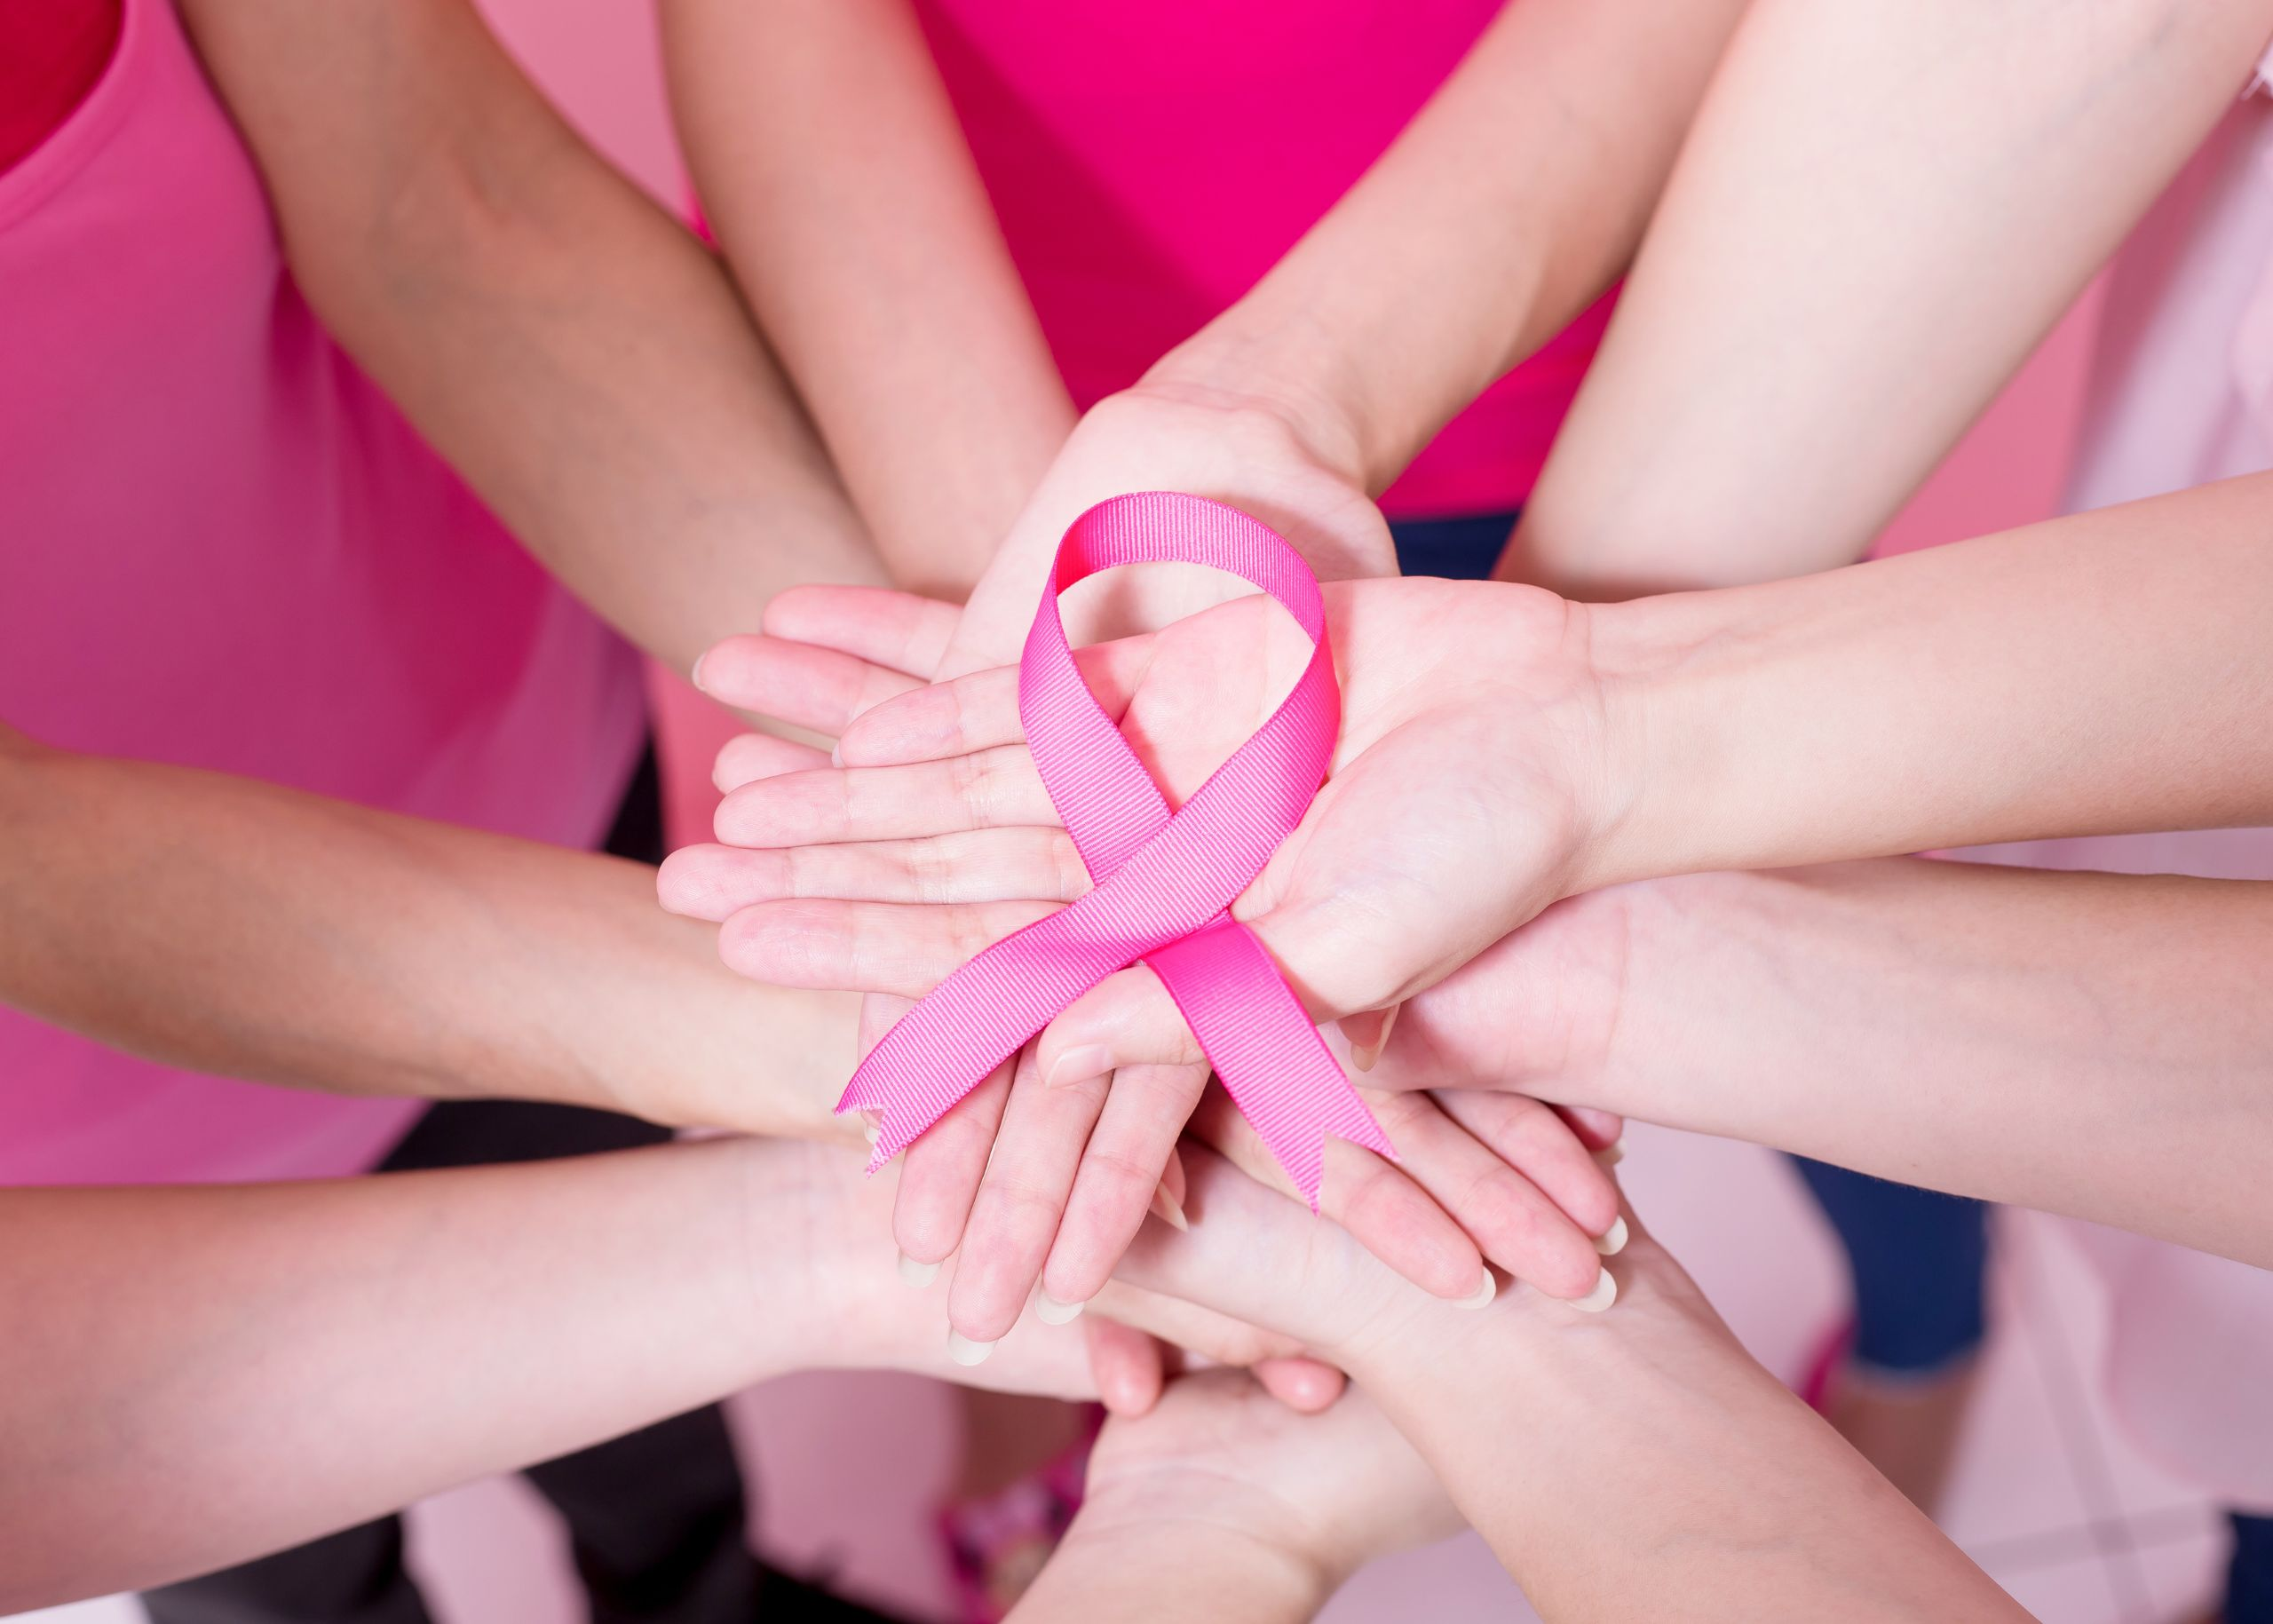

### 📌 Project Description:

Breast cancer is one of the most common cancers worldwide, and early detection plays a crucial role in improving survival rates. This project focuses on building a **machine learning model using Logistic Regression** to classify whether a tumor is **malignant (cancerous)** or **benign (non-cancerous)** based on various medical diagnostic features.

[Breast Cancer Dataset](https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset)

The dataset used contains attributes computed from digitized images of fine needle aspirates (FNA) of breast masses, such as radius, texture, smoothness, compactness, concavity, symmetry, and fractal dimension.

### 📌 Breast Cancer Dataset Feature Description

| **Feature**   | **Meaning**                                    | **Relevance to Cancer**                     |
| ------------- | ---------------------------------------------- | ------------------------------------------- |
| **id**        | Unique identifier for each patient             | Not useful for prediction → usually dropped |
| **diagnosis** | Target variable: `M` = Malignant, `B` = Benign | What we want to predict                     |

- **Mean Features (average values)**

| **Feature**                  | **Meaning**                                 | **Cancer Relevance**            |
| ---------------------------- | ------------------------------------------- | ------------------------------- |
| **radius\_mean**             | Average distance from tumor center to edges | Larger in malignant tumors      |
| **texture\_mean**            | Variation in gray levels inside tumor       | Higher in malignant tumors      |
| **perimeter\_mean**          | Average boundary length                     | Longer in malignant tumors      |
| **area\_mean**               | Average tumor area (size)                   | Malignant tumors usually larger |
| **smoothness\_mean**         | How smooth the edges are                    | Malignant tumors = less smooth  |
| **compactness\_mean**        | Compactness = (perimeter² / area - 1.0)     | Higher for malignant            |
| **concavity\_mean**          | Depth of concave (inward) parts of tumor    | Higher for malignant            |
| **concave points\_mean**     | Number of concave points in boundary        | Strong predictor of malignancy  |
| **symmetry\_mean**           | Symmetry of tumor shape                     | Benign = more symmetric         |
| **fractal\_dimension\_mean** | Measure of edge complexity                  | Higher for malignant            |

- **Standard Error Features (variation/uncertainty)**

| **Feature**                | **Meaning**                      | **Cancer Relevance**            |
| -------------------------- | -------------------------------- | ------------------------------- |
| **radius\_se**             | Variation in radius across cells | Higher in malignant             |
| **texture\_se**            | Variation in texture             | More irregular in malignant     |
| **perimeter\_se**          | Variation in perimeter           | Higher in malignant             |
| **area\_se**               | Variation in area                | Malignant tumors = less uniform |
| **smoothness\_se**         | Variation in smoothness          | Slightly higher in malignant    |
| **compactness\_se**        | Variation in compactness         | Higher = more irregular         |
| **concavity\_se**          | Variation in concavity           | Malignant = more variable       |
| **concave points\_se**     | Variation in concave points      | Higher = malignant indicator    |
| **symmetry\_se**           | Variation in symmetry            | More irregular in malignant     |
| **fractal\_dimension\_se** | Variation in fractal dimension   | Captures boundary irregularity  |

- **Worst Features (largest/extreme values)**

| **Feature**                   | **Meaning**               | **Cancer Relevance**           |
| ----------------------------- | ------------------------- | ------------------------------ |
| **radius\_worst**             | Largest radius            | Much larger in malignant       |
| **texture\_worst**            | Largest texture variation | Higher in malignant            |
| **perimeter\_worst**          | Longest perimeter         | Malignant tumors               |
| **area\_worst**               | Largest area              | Strong predictor of malignancy |
| **smoothness\_worst**         | Worst-case smoothness     | Edges more irregular           |
| **compactness\_worst**        | Worst compactness         | Malignant = higher             |
| **concavity\_worst**          | Worst concavity           | Malignant = very high          |
| **concave points\_worst**     | Worst concave points      | One of the best predictors     |
| **symmetry\_worst**           | Worst symmetry            | Malignant = asymmetric         |
| **fractal\_dimension\_worst** | Worst boundary complexity | Higher in malignant            |


### Import all Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding:

#### A. Read the CSV file

In [2]:
breast_cancer = pd.read_csv("breast_cancer.csv")
breast_cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

#### Observation:
- This is a classification based problem

#### B. Print shape and Column of the dataset

In [3]:
print("Shape of the dataset: ", breast_cancer.shape)
print()
print("Columns present in the dataset: \n", breast_cancer.columns)

Shape of the dataset:  (569, 32)

Columns present in the dataset: 
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


#### Observation:
- There are 569 rows and 32 columns present in the dataset.

#### C. Information about the dataset

In [4]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- There are **30 float** data types, **1 integer** data type, and **1 categorical/object** data type present in the dataset.
- There are no missing values present in the dataset.
- **"diagnosis"** is the target variable.
-  **"id"** column can be dropped later as it adds no value to the model.
-  We need to map the features in **"diagnosis"** column as **M=1 and B=0**

#### D. Drop id column as it adds no value to the model training 

In [5]:
breast_cancer = breast_cancer.drop(columns="id", axis=1)

#### E. Map the features in "diagnosis" column as M=1 and B=0

In [6]:
breast_cancer["diagnosis"] = breast_cancer["diagnosis"].map({"M":1, "B":0})

#### F. Check for missing values

In [7]:
missing_values = breast_cancer.isnull().sum()
print("Missing values: \n", missing_values)

Missing values: 
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


#### Observation:
- As mentioned above there are no missing values present in the dataset.

#### G. Check for duplicate values

In [8]:
duplicates = breast_cancer.duplicated().sum()
print(duplicates)

0


#### Observation:
- There are no duplicate values present in the dataset.

#### H. Group the features into mean, standard error, and worst features

In [9]:
# Mean features
mean_features = list(breast_cancer.columns[1:11])

# Standard Error features
se_features = list(breast_cancer.columns[11:21])

# worst features
worst_features = list(breast_cancer.columns[21:31])

#### I. Append all the 3 features with "diagnosis"

In [34]:
mean_features.append("diagnosis")
print("Mean Features", mean_features)
print()
se_features.append("diagnosis")
print("Standard Error Features", se_features)
print()
worst_features.append("diagnosis")
print("Error Features", se_features)

Mean Features ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis', 'diagnosis', 'diagnosis', 'diagnosis']

Standard Error Features ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'diagnosis', 'diagnosis', 'diagnosis', 'diagnosis']


### 2. Data Exploration and Analysis (EDA)

#### A. Visualize the distribution of diagnosis column

In [12]:
breast_cancer["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

#### Countplot

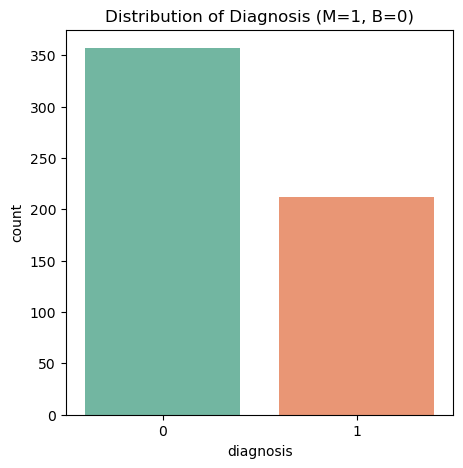

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(data=breast_cancer, x="diagnosis", palette="Set2")
plt.title("Distribution of Diagnosis (M=1, B=0)")
plt.show()

#### Pie chart

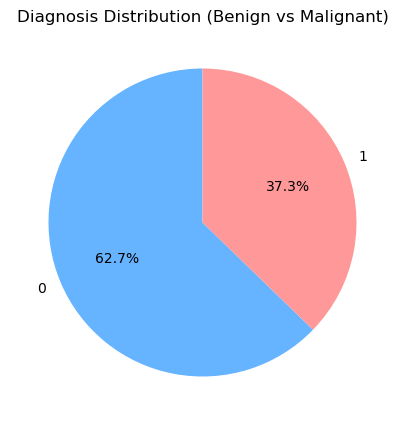

In [14]:
plt.figure(figsize=(5,5))

# Count values
diagnosis_counts = breast_cancer['diagnosis'].value_counts()

# Pie chart
plt.pie(
    diagnosis_counts, 
    labels=diagnosis_counts.index, 
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)

plt.title("Diagnosis Distribution (Benign vs Malignant)", fontsize=12)
plt.show()

- The distribution of diagnosis is slightly imbalanced (more benign than malignant).

#### B. Corrilation matrix

#### 1. Mean features

In [15]:
corr_mean = breast_cancer[mean_features].corr() 
corr_mean

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.323782        0.997855   0.987357   
texture_mean               0.323782      1.000000        0.329533   0.321086   
perimeter_mean             0.997855      0.329533        1.000000   0.986507   
area_mean                  0.987357      0.321086        0.986507   1.000000   
smoothness_mean            0.170581     -0.023389        0.207278   0.177028   
compactness_mean           0.506124      0.236702        0.556936   0.498502   
concavity_mean             0.676764      0.302418        0.716136   0.685983   
concave points_mean        0.822529      0.293464        0.850977   0.823269   
symmetry_mean              0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean    -0.311631     -0.076437       -0.261477  -0.283110   
diagnosis                  0.730029      0.415185        0.742636   0.708984   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.170581          0.506124        0.676764   
texture_mean                  -0.023389          0.236702        0.302418   
perimeter_mean                 0.207278          0.556936        0.716136   
area_mean                      0.177028          0.498502        0.685983   
smoothness_mean                1.000000          0.659123        0.521984   
compactness_mean               0.659123          1.000000        0.883121   
concavity_mean                 0.521984          0.883121        1.000000   
concave points_mean            0.553695          0.831135        0.921391   
symmetry_mean                  0.557775          0.602641        0.500667   
fractal_dimension_mean         0.584792          0.565369        0.336783   
diagnosis                      0.358560          0.596534        0.696360   

                        concave points_mean  symmetry_mean  \
radius_mean                        0.822529       0.147741   
texture_mean                       0.293464       0.071401   
perimeter_mean                     0.850977       0.183027   
area_mean                          0.823269       0.151293   
smoothness_mean                    0.553695       0.557775   
compactness_mean                   0.831135       0.602641   
concavity_mean                     0.921391       0.500667   
concave points_mean                1.000000       0.462497   
symmetry_mean                      0.462497       1.000000   
fractal_dimension_mean             0.166917       0.479921   
diagnosis                          0.776614       0.330499   

                        fractal_dimension_mean  diagnosis  
radius_mean                          -0.311631   0.730029  
texture_mean                         -0.076437   0.415185  
perimeter_mean                       -0.261477   0.742636  
area_mean                            -0.283110   0.708984  
smoothness_mean                       0.584792   0.358560  
compactness_mean                      0.565369   0.596534  
concavity_mean                        0.336783   0.696360  
concave points_mean                   0.166917   0.776614  
symmetry_mean                         0.479921   0.330499  
fractal_dimension_mean                1.000000  -0.012838  
diagnosis                            -0.012838   1.000000

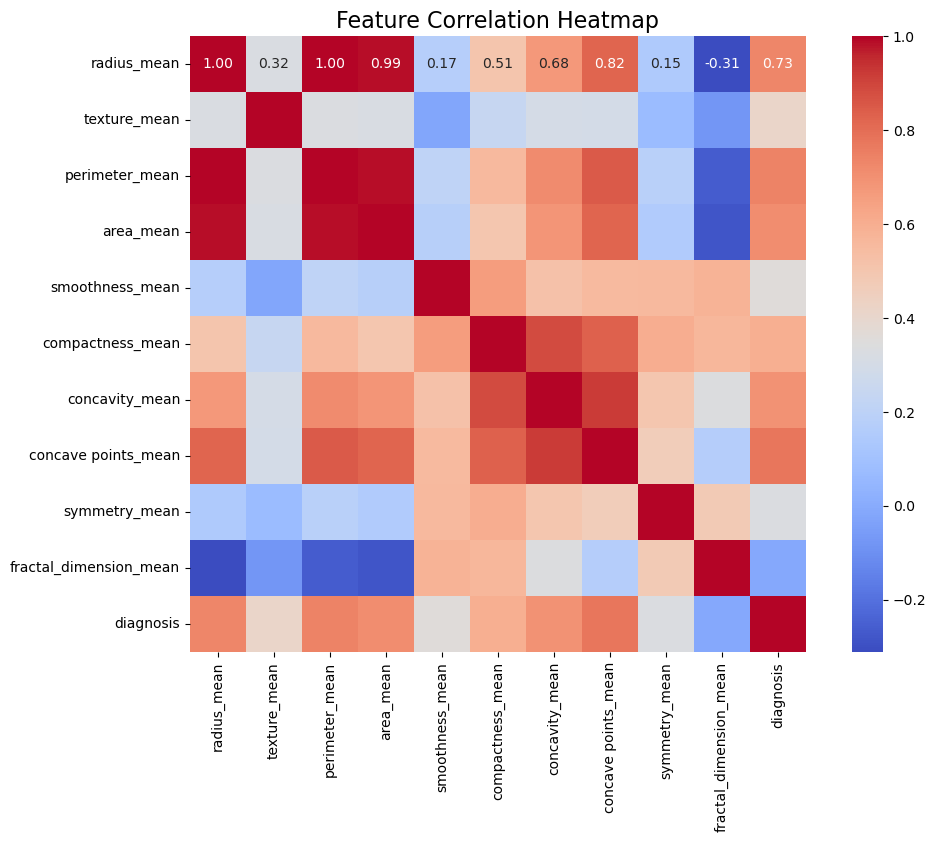

In [16]:
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_mean, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

#### Observation:
- **i. Highly correlated with diagnosis (malignant vs benign):**

     - Perimeter_mean (0.74), radius_mean (0.73), concave points_mean (0.78), area_mean (0.71), concavity_mean (0.70).
     - These are the most powerful predictors of cancer type.

- **ii. Moderately correlated with diagnosis:**

     - Compactness_mean (0.60), texture_mean (0.42), smoothness_mean (0.36), symmetry_mean (0.33).
     - Helpful but less predictive individually.

- **iii. Not correlated/irrelevant:**

     - Fractal_dimension_mean (-0.01) → almost no relationship.

- We can use the corrilation values and then pick out the features that we want to use in our model. 

#### 2. Standard features

In [17]:
corr_se = breast_cancer[se_features].corr() 
corr_se

radius_se  texture_se  perimeter_se   area_se  \
radius_se              1.000000    0.213247      0.972794  0.951830   
texture_se             0.213247    1.000000      0.223171  0.111567   
perimeter_se           0.972794    0.223171      1.000000  0.937655   
area_se                0.951830    0.111567      0.937655  1.000000   
smoothness_se          0.164514    0.397243      0.151075  0.075150   
compactness_se         0.356065    0.231700      0.416322  0.284840   
concavity_se           0.332358    0.194998      0.362482  0.270895   
concave points_se      0.513346    0.230283      0.556264  0.415730   
symmetry_se            0.240567    0.411621      0.266487  0.134109   
fractal_dimension_se   0.227754    0.279723      0.244143  0.127071   
diagnosis              0.567134   -0.008303      0.556141  0.548236   

                      smoothness_se  compactness_se  concavity_se  \
radius_se                  0.164514        0.356065      0.332358   
texture_se                 0.397243        0.231700      0.194998   
perimeter_se               0.151075        0.416322      0.362482   
area_se                    0.075150        0.284840      0.270895   
smoothness_se              1.000000        0.336696      0.268685   
compactness_se             0.336696        1.000000      0.801268   
concavity_se               0.268685        0.801268      1.000000   
concave points_se          0.328429        0.744083      0.771804   
symmetry_se                0.413506        0.394713      0.309429   
fractal_dimension_se       0.427374        0.803269      0.727372   
diagnosis                 -0.067016        0.292999      0.253730   

                      concave points_se  symmetry_se  fractal_dimension_se  \
radius_se                      0.513346     0.240567              0.227754   
texture_se                     0.230283     0.411621              0.279723   
perimeter_se                   0.556264     0.266487              0.244143   
area_se                        0.415730     0.134109              0.127071   
smoothness_se                  0.328429     0.413506              0.427374   
compactness_se                 0.744083     0.394713              0.803269   
concavity_se                   0.771804     0.309429              0.727372   
concave points_se              1.000000     0.312780              0.611044   
symmetry_se                    0.312780     1.000000              0.369078   
fractal_dimension_se           0.611044     0.369078              1.000000   
diagnosis                      0.408042    -0.006522              0.077972   

                      diagnosis  
radius_se              0.567134  
texture_se            -0.008303  
perimeter_se           0.556141  
area_se                0.548236  
smoothness_se         -0.067016  
compactness_se         0.292999  
concavity_se           0.253730  
concave points_se      0.408042  
symmetry_se           -0.006522  
fractal_dimension_se   0.077972  
diagnosis              1.000000

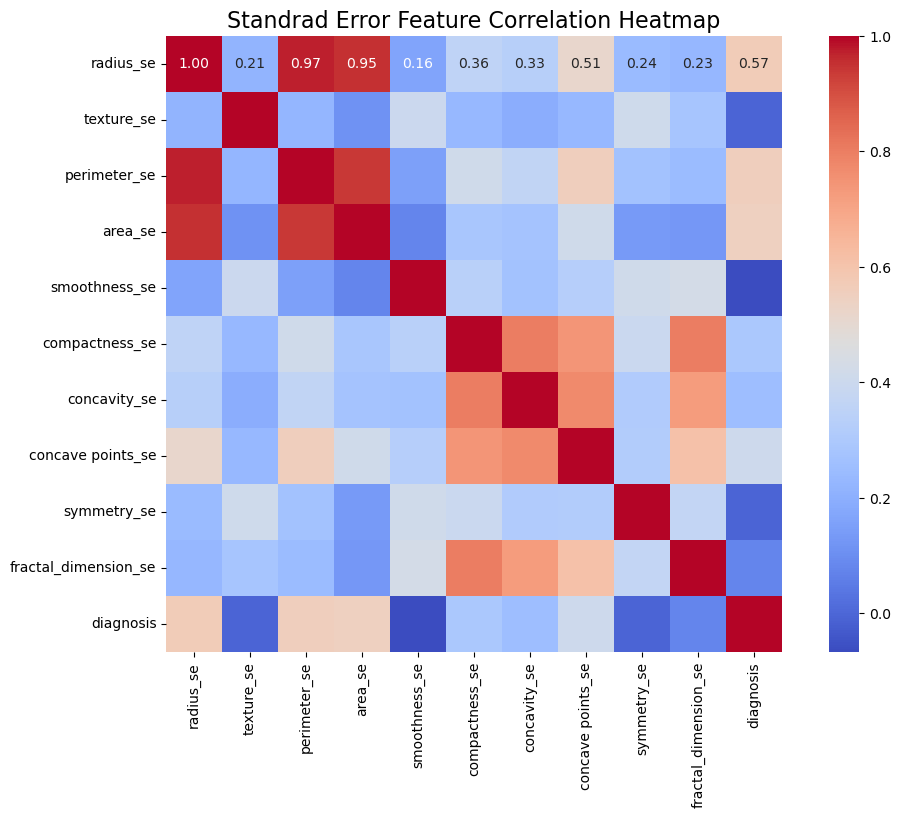

In [18]:
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_se, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Standrad Error Feature Correlation Heatmap", fontsize=16)
plt.show()

#### Observation:

- **i. Highly correlated with diagnosis (malignant vs benign):**
    - radius_se (0.57), perimeter_se (0.56), area_se (0.55), concave points_se (0.41)
    - These features are the most informative among the _se set for predicting cancer type.

- **ii. Moderately correlated with diagnosis:**
    - compactness_se (0.29), concavity_se (0.25)
    - Provide some predictive value but weaker individually.

- **iii. Not correlated/irrelevant:**
    - texture_se (-0.008), smoothness_se (-0.067), symmetry_se (-0.0065), fractal_dimension_se (0.078)
    - These have very low correlation with diagnosis and are less useful on their own.

- We can use the corrilation values and then pick out the features that we want to use in our model. 

#### 3. Worst Features

In [19]:
corr_worst = breast_cancer[worst_features].corr() 
corr_worst

radius_worst  texture_worst  perimeter_worst  \
radius_worst                 1.000000       0.359921         0.993708   
texture_worst                0.359921       1.000000         0.365098   
perimeter_worst              0.993708       0.365098         1.000000   
area_worst                   0.984015       0.345842         0.977578   
smoothness_worst             0.216574       0.225429         0.236775   
compactness_worst            0.475820       0.360832         0.529408   
concavity_worst              0.573975       0.368366         0.618344   
concave points_worst         0.787424       0.359755         0.816322   
symmetry_worst               0.243529       0.233027         0.269493   
fractal_dimension_worst      0.093492       0.219122         0.138957   
diagnosis                    0.776454       0.456903         0.782914   

                         area_worst  smoothness_worst  compactness_worst  \
radius_worst               0.984015          0.216574           0.475820   
texture_worst              0.345842          0.225429           0.360832   
perimeter_worst            0.977578          0.236775           0.529408   
area_worst                 1.000000          0.209145           0.438296   
smoothness_worst           0.209145          1.000000           0.568187   
compactness_worst          0.438296          0.568187           1.000000   
concavity_worst            0.543331          0.518523           0.892261   
concave points_worst       0.747419          0.547691           0.801080   
symmetry_worst             0.209146          0.493838           0.614441   
fractal_dimension_worst    0.079647          0.617624           0.810455   
diagnosis                  0.733825          0.421465           0.590998   

                         concavity_worst  concave points_worst  \
radius_worst                    0.573975              0.787424   
texture_worst                   0.368366              0.359755   
perimeter_worst                 0.618344              0.816322   
area_worst                      0.543331              0.747419   
smoothness_worst                0.518523              0.547691   
compactness_worst               0.892261              0.801080   
concavity_worst                 1.000000              0.855434   
concave points_worst            0.855434              1.000000   
symmetry_worst                  0.532520              0.502528   
fractal_dimension_worst         0.686511              0.511114   
diagnosis                       0.659610              0.793566   

                         symmetry_worst  fractal_dimension_worst  diagnosis  
radius_worst                   0.243529                 0.093492   0.776454  
texture_worst                  0.233027                 0.219122   0.456903  
perimeter_worst                0.269493                 0.138957   0.782914  
area_worst                     0.209146                 0.079647   0.733825  
smoothness_worst               0.493838                 0.617624   0.421465  
compactness_worst              0.614441                 0.810455   0.590998  
concavity_worst                0.532520                 0.686511   0.659610  
concave points_worst           0.502528                 0.511114   0.793566  
symmetry_worst                 1.000000                 0.537848   0.416294  
fractal_dimension_worst        0.537848                 1.000000   0.323872  
diagnosis                      0.416294                 0.323872   1.000000

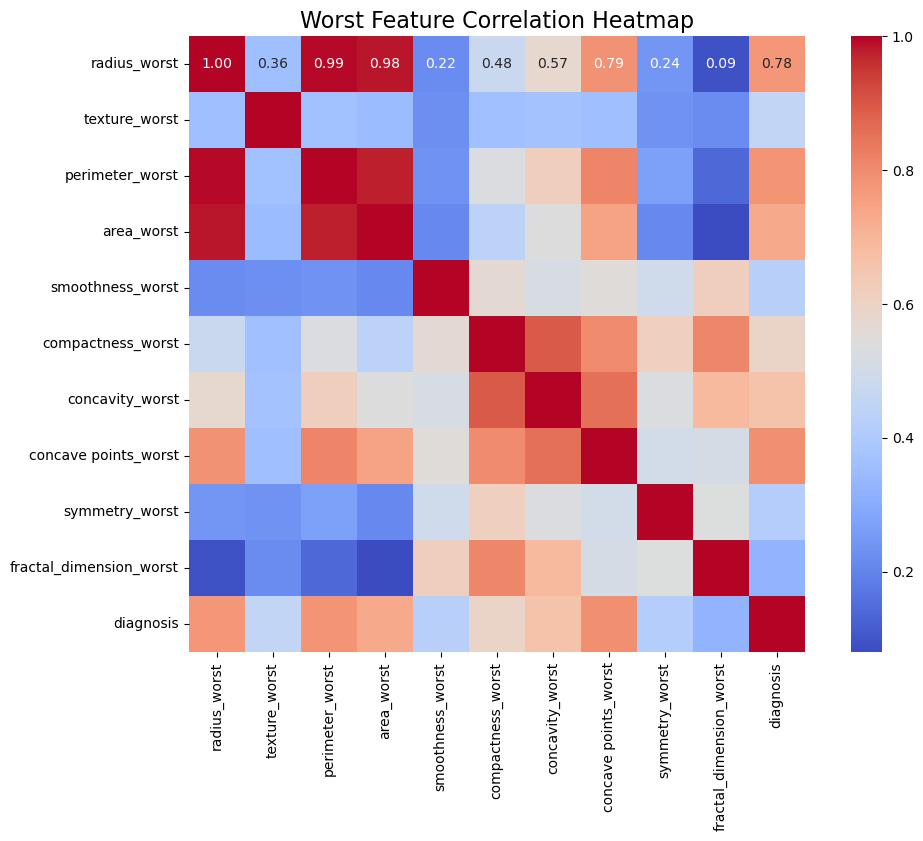

In [20]:
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_worst, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Worst Feature Correlation Heatmap", fontsize=16)
plt.show()

#### Observation:

- i. Highly correlated with diagnosis (malignant vs benign):
     - concave points_worst (0.79), perimeter_worst (0.78), radius_worst (0.77), area_worst (0.73), concavity_worst (0.66)
     - These are the most powerful predictors of cancer type among the _worst features.

- ii. Moderately correlated with diagnosis:
     - compactness_worst (0.59), texture_worst (0.46), smoothness_worst (0.42), symmetry_worst (0.42)
     - Helpful but less predictive individually.

- iii. Low correlation / less relevant:
     - fractal_dimension_worst (0.32)
     - Has lower predictive power compared to other _worst features.

### 3. Feature Engineering:

#### A. Select all the variables that we will be using in our model

In [21]:
prediction_vars= ["radius_mean", "perimeter_mean", "area_mean", "compactness_mean", "concavity_mean", "concave points_mean", "radius_se", "perimeter_se", "area_se",
                  "radius_worst", "perimeter_worst","concave points_worst"]

#### Observation:
The features were chosen based on their strong correlation with the target variable (diagnosis) and their clinical relevance in distinguishing between malignant and benign tumors. A limited number of variables are used to reduce complexity and minimize the risk of overfitting.

### 4. Model training

#### A. Split the data into X and y 

In [22]:
X = breast_cancer[prediction_vars]
y = breast_cancer["diagnosis"]

#### C. Split data into train and test. Keep 15% data reserved for testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [24]:
# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (483, 12)
X_test shape: (86, 12)
y_train shape: (483,)
y_test shape: (86,)


#### D. Scale the model

In [25]:
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

#### E. Train a Supervised Learning Classification base model - Logistic Regression

In [26]:
log_reg_1 = LogisticRegression(max_iter=1000, random_state=1)
log_reg_1.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, random_state=1)

#### F. Print evaluation metrics for the model and clearly share insights.

In [27]:
# Predict
y_pred_1 = log_reg_1.predict(X_test_scaled)

# Classification Report
class_report_1 = classification_report(y_test, y_pred_1)
print("Classification Report: \n",class_report_1)
print()
# Confusion matrix
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix: \n",conf_matrix_1)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.85      0.92        34

    accuracy                           0.94        86
   macro avg       0.96      0.93      0.94        86
weighted avg       0.95      0.94      0.94        86


Confusion Matrix: 
 [[52  0]
 [ 5 29]]


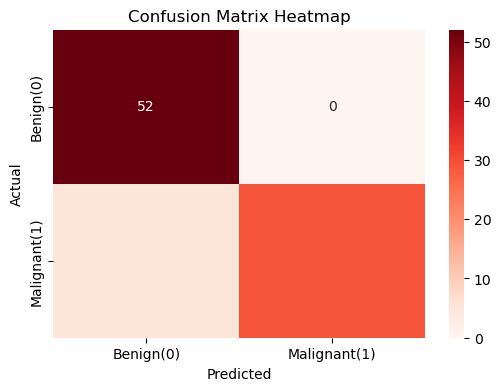

In [28]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign(0)','Malignant(1)'], yticklabels=['Benign(0)','Malignant(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### G. Retrain the Logistic Regression Model with parameter "class_weight="balanced

In [29]:
log_reg_2 = LogisticRegression(max_iter=1000,class_weight="balanced" ,random_state=1)
log_reg_2.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=1)

#### Observation:

The dataset has more benign (0) than malignant (1) cases. Using class_weight='balanced' makes the model pay more attention to malignant tumors, improving recall for the minority class and reducing the chance of missing critical cases.

In [30]:
# Predict
y_pred_2 = log_reg_2.predict(X_test_scaled)

# Classification Report
class_report_2 = classification_report(y_test, y_pred_2)
print("Classification Report: \n",class_report_2)
print()
# Confusion matrix
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix: \n",conf_matrix_2)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.97      0.85      0.91        34

    accuracy                           0.93        86
   macro avg       0.94      0.92      0.93        86
weighted avg       0.93      0.93      0.93        86


Confusion Matrix: 
 [[51  1]
 [ 5 29]]


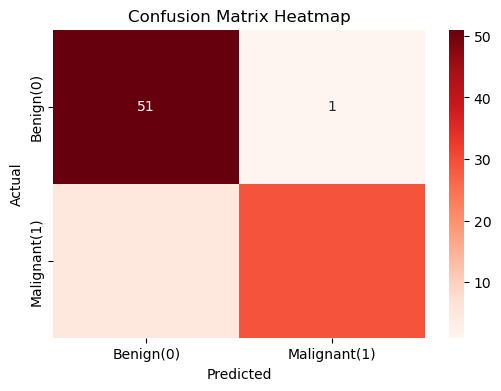

In [31]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign(0)','Malignant(1)'], yticklabels=['Benign(0)','Malignant(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### Overall Observation:

#### Model Evaluation Insights

#### 1. Original Logistic Regression (without class weighting)
- **Accuracy:** 94%  
- **Benign (0) recall:** 1.00 → all benign tumors correctly identified  
- **Malignant (1) recall:** 0.85 → most malignant tumors detected, 5 false negatives  
- **Precision for malignant:** 1.00 → all predicted malignant cases are correct  

#### 2. Logistic Regression with `class_weight="balanced"`
- **Accuracy:** 93% (slight drop)  
- **Benign (0) recall:** 0.98 → almost all benign tumors correctly identified  
- **Malignant (1) recall:** 0.85 → same as before, 5 false negatives  
- **Precision for malignant:** 0.97 → slightly lower than unweighted, small tradeoff for fairness  

#### Takeaways
- Using `class_weight="balanced"` slightly **reduces overall accuracy** and precision for malignant tumors but maintains recall.  
- The model is now **less biased toward the majority class (benign)**, ensuring both classes contribute fairly during training.  
- With **moderate class imbalance**, the difference is small, but in more imbalanced datasets, `class_weight="balanced"` helps prevent the model from ignoring the minority class.
